# **Problématique : Où exporter nos volailles biologiques?**

## I) Importations biblithèque & fichiers nattifs

#### a) Importation bibliothéque

In [1]:
import pandas as pd
import numpy as np


#### b) téléchargement des données

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
chemin='//content//drive//MyDrive//Projet 11//datas//'
dispo_alimentaire_2017=pd.read_csv(chemin+"DisponibiliteAlimentaire_2017.csv")
population_2000_2018=pd.read_csv(chemin+"Population_2000_2018.csv")
agrifood = pd.read_stata(chemin+'agrifood_BanqueMondiale.dta')


pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pop_mondial_2018=7.7*1_000_000_000
pop_mondial_2018

7700000000.0

## II) Nettoyage et fusion des données


### Fichiers transmis

#### a) Analyse dispo_alimentaire_2017

In [4]:
dispo_alimentaire_2017.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [5]:
print(f" Nombre de lignes : {dispo_alimentaire_2017.shape[0]}")
print(f"Nombre de colonnes : {dispo_alimentaire_2017.shape[1]}")

 Nombre de lignes : 176600
Nombre de colonnes : 14


In [6]:
dispo_alimentaire_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

##### Exploration colonne Produit

In [7]:
dispo_alimentaire_2017["Produit"].unique().tolist()

['Blé et produits',
 'Riz et produits',
 'Orge et produits',
 'Maïs et produits',
 'Seigle et produits',
 'Avoine',
 'Millet et produits',
 'Sorgho et produits',
 'Céréales, Autres',
 'Pommes de Terre et produits',
 'Ignames',
 'Racines nda',
 'Sucre, canne',
 'Sucre, betterave',
 'Sucre Eq Brut',
 'Edulcorants Autres',
 'Miel',
 'Haricots',
 'Pois',
 'Légumineuses Autres et produits',
 'Noix et produits',
 'Soja',
 'Arachides Decortiquees',
 'Graines de tournesol',
 'Graines Colza/Moutarde',
 'Graines de coton',
 'Coco (Incl Coprah)',
 'Sésame',
 'Olives',
 'Plantes Oleiferes, Autre',
 'Huile de Soja',
 "Huile d'Arachide",
 'Huile de Tournesol',
 'Huile de Colza&Moutarde',
 'Huile Graines de Coton',
 'Huile de Palmistes',
 'Huile de Palme',
 'Huile de Coco',
 'Huile de Sésame',
 "Huile d'Olive",
 'Huile de Son de Riz',
 'Huile de Germe de Maïs',
 'Huil Plantes Oleif Autr',
 'Tomates et produits',
 'Oignons',
 'Légumes, Autres',
 'Oranges, Mandarines',
 'Citrons & Limes et produits',
 

In [8]:
# Filtrage Produit : Viande de Volailles
dispo_alimentaire_2017_volailles=dispo_alimentaire_2017[dispo_alimentaire_2017["Produit"]=="Viande de Volailles"]
dispo_alimentaire_2017_volailles.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.0,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.0,S,Données standardisées
653,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
654,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.0,S,Données standardisées
655,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2.0,S,Données standardisées


In [9]:
dispo_alimentaire_2017["Élément"].unique().tolist()

['Production',
 'Importations - Quantité',
 'Variation de stock',
 'Exportations - Quantité',
 'Disponibilité intérieure',
 'Aliments pour animaux',
 'Semences',
 'Pertes',
 'Résidus',
 'Nourriture',
 'Disponibilité alimentaire en quantité (kg/personne/an)',
 'Disponibilité alimentaire (Kcal/personne/jour)',
 'Disponibilité de protéines en quantité (g/personne/jour)',
 'Disponibilité de matière grasse en quantité (g/personne/jour)',
 'Traitement',
 'Autres utilisations (non alimentaire)',
 'Alimentation pour touristes']

###### Suppression colonnes inutiles

In [10]:
import pandas as pd

# 1. Filtrage avec TOUTES les variables nécessaires
elements_necessaires = [
    "Production",
    "Importations - Quantité",
    "Exportations - Quantité",
    "Variation de stock",
    "Disponibilité intérieure",
    "Nourriture"  # C'est la disponibilité alimentaire en tonnes
]

df_volailles = dispo_alimentaire_2017[
    (dispo_alimentaire_2017["Produit"] == "Viande de Volailles") &
    (dispo_alimentaire_2017["Élément"].isin(elements_necessaires))
].copy()

# 2. Pivotage
df_pivot = pd.pivot_table(
    df_volailles,
    index=['Zone', 'Année'],
    columns='Élément',
    values='Valeur',
    aggfunc='first'
).reset_index()

df_pivot['Dépendance_import(%)']=((df_pivot['Importations - Quantité'] / df_pivot['Disponibilité intérieure']) * 100 )
# Remplacer les chaînes vides par NaN (si nécessaire)
df_pivot['Exportations - Quantité'] = df_pivot['Exportations - Quantité'].replace("", np.nan)

# Calculer l'autosuffisance en remplaçant les NaN dans les exportations par 0
df_pivot['Autosuffisance(%)'] = (
    df_pivot['Production'] /
    (df_pivot['Disponibilité intérieure'])
) * 100


# Version 2 (pour sécurité alimentaire)


# 4. Sélection finale
colonnes_finales = [
    'Zone',
    'Production',
    'Importations - Quantité',
    'Autosuffisance(%)',
    'Dépendance_import(%)'
]

dispo_alimentaire_2017_volailles = df_pivot[colonnes_finales]
dispo_alimentaire_2017_volailles.head()

Élément,Zone,Production,Importations - Quantité,Autosuffisance(%),Dépendance_import(%)
0,Afghanistan,28.0,29.0,49.122807,50.877193
1,Afrique du Sud,1667.0,514.0,78.706327,24.268178
2,Albanie,13.0,38.0,27.659574,80.851064
3,Algérie,275.0,2.0,99.277978,0.722022
4,Allemagne,1514.0,842.0,87.061530,48.418631


In [11]:
df_pivot[['Autosuffisance(%)', 'Dépendance_import(%)']].corr()

Élément,Autosuffisance(%),Dépendance_import(%)
Élément,,
Autosuffisance(%),1.00000,-0.45717
Dépendance_import(%),-0.45717,1.00000


In [12]:
print(f"Somme vide : {dispo_alimentaire_2017_volailles.isna().sum()}")

Somme vide : Élément
Zone                       0
Production                 2
Importations - Quantité    0
Autosuffisance(%)          2
Dépendance_import(%)       0
dtype: int64


In [13]:
missing = dispo_alimentaire_2017_volailles[
    dispo_alimentaire_2017_volailles["Production"].isna() |
    dispo_alimentaire_2017_volailles["Autosuffisance(%)"].isna()
]
missing["Zone"].tolist()

['Djibouti', 'Maldives']

In [14]:
dispo_alimentaire_2017_volailles = dispo_alimentaire_2017_volailles.dropna()
print(f"Somme vide : {dispo_alimentaire_2017_volailles.isna().sum()}")

Somme vide : Élément
Zone                       0
Production                 0
Importations - Quantité    0
Autosuffisance(%)          0
Dépendance_import(%)       0
dtype: int64


In [15]:
print(f"Nb Pays : {dispo_alimentaire_2017_volailles.shape[0]}")

Nb Pays : 168


Fusion df nourriture animale total & dispo alimentaire

#### b) Analyse Population_2000_2018

In [16]:
population_2000_2018.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [17]:
print(f"Nombre de lignes : {population_2000_2018.shape[0]}")
print(f'Nombre de colonnes : {population_2000_2018.shape[1]}')

Nombre de lignes : 4411
Nombre de colonnes : 15


In [18]:
population_2000_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [19]:
df_clean = population_2000_2018[['Zone', 'Année', 'Valeur']]
df_filtered = df_clean[df_clean['Année'].isin([2000, 2018])]
df_pivot = df_filtered.pivot(index='Zone', columns='Année', values='Valeur').reset_index()
df_pivot.columns.name = None
df_pivot.rename(columns={2000: 'Pop_2000', 2018: 'Pop_2018'}, inplace=True)
df_pivot['Croissance_Population_2000_2018_%'] = (((df_pivot['Pop_2018'] - df_pivot['Pop_2000']) / df_pivot['Pop_2000']) * 100).round(2)
print(df_pivot[['Zone', 'Pop_2000', 'Pop_2018', 'Croissance_Population_2000_2018_%']])

                          Zone   Pop_2000   Pop_2018  Croissance_Population_2000_2018_%
0                  Afghanistan  20779.953  37171.921                              78.88
1               Afrique du Sud  44967.708  57792.518                              28.52
2                      Albanie   3129.243   2882.740                              -7.88
3                      Algérie  31042.235  42228.408                              36.04
4                    Allemagne  81400.882  83124.418                               2.12
..                         ...        ...        ...                                ...
233               Îles Salomon    412.660    652.857                              58.21
234    Îles Turques-et-Caïques     20.164     37.665                              86.79
235   Îles Vierges américaines    108.722    104.680                              -3.72
236  Îles Vierges britanniques     20.311     29.802                              46.73
237      Îles Wallis-et-Futuna  

In [20]:
main_df=dispo_alimentaire_2017_volailles.merge(df_pivot,how="inner",on="Zone")
main_df.head()

,Zone,Production,Importations - Quantité,Autosuffisance(%),Dépendance_import(%),Pop_2000,Pop_2018,Croissance_Population_2000_2018_%
0,Afghanistan,28.0,29.0,49.122807,50.877193,20779.953,37171.921,78.88
1,Afrique du Sud,1667.0,514.0,78.706327,24.268178,44967.708,57792.518,28.52
2,Albanie,13.0,38.0,27.659574,80.851064,3129.243,2882.740,-7.88
3,Algérie,275.0,2.0,99.277978,0.722022,31042.235,42228.408,36.04
4,Allemagne,1514.0,842.0,87.061530,48.418631,81400.882,83124.418,2.12


In [21]:
print(f" Nombre de pays : {len(main_df['Zone'].unique().tolist())}")
print(f" Population total actuel : {(main_df['Pop_2018'].sum())*1000}")

 Nombre de pays : 168
 Population total actuel : 7407044109.000001


Fusion référene_iso3 et main_df

In [22]:
correspondance_iso3=pd.read_excel(chemin+"correspondance_iso3.xlsx")
main_df=main_df.merge(correspondance_iso3,how="inner",on="Zone")
main_df.head()

,Zone,Production,Importations - Quantité,Autosuffisance(%),Dépendance_import(%),Pop_2000,Pop_2018,Croissance_Population_2000_2018_%,Country Code
0,Afghanistan,28.0,29.0,49.122807,50.877193,20779.953,37171.921,78.88,AFG
1,Afrique du Sud,1667.0,514.0,78.706327,24.268178,44967.708,57792.518,28.52,ZAF
2,Albanie,13.0,38.0,27.659574,80.851064,3129.243,2882.740,-7.88,ALB
3,Algérie,275.0,2.0,99.277978,0.722022,31042.235,42228.408,36.04,DZA
4,Allemagne,1514.0,842.0,87.061530,48.418631,81400.882,83124.418,2.12,DEU


#### c) Dataset Agriculture Banque Mondiale

In [23]:
agrifood.head(20)

,iso3,year,IDB,sugarcal,sugargrams,procmeat,unprocmeat,refinedgrain,wholegrain,milk,vegetables,fruits,PSE_overall,CSE_overall,GSSE_overall,TSE_overall,TCT_overall,MPS_overall,MPS_NEG_overall,PSCT_overall,CSCT_overall,GFR_overall,QC_overall,QP_overall,VP_overall,MPS_sugar,PSCT_sugar,CSCT_sugar,QC_sugar,QP_sugar,VP_sugar,MPS_meat,PSCT_meat,CSCT_meat,QC_meat,QP_meat,VP_meat,MPS_grains,PSCT_grains,CSCT_grains,QC_grains,QP_grains,VP_grains,MPS_milk,PSCT_milk,CSCT_milk,QC_milk,QP_milk,VP_milk,MPS_vegetables,PSCT_vegetables,CSCT_vegetables,QC_vegetables,QP_vegetables,VP_vegetables,MPS_fruits,PSCT_fruits,CSCT_fruits,QC_fruits,QP_fruits,VP_fruits,MPS_beef_veal,PSCT_beef_veal,VP_beef_veal,MPS_maize,PSCT_maize,VP_maize,MPS_pork,PSCT_pork,VP_pork,MPS_poultry,PSCT_poultry,VP_poultry,MPS_rice,PSCT_rice,VP_rice,MPS_soybeans,PSCT_soybeans,VP_soybeans,MPS_wheat,PSCT_wheat,VP_wheat
0,AFG,1990,NaN,0.040036,0.010009,3.008822,38.305019,347.782593,166.276245,70.280251,153.458694,76.640480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AGO,1990,NaN,26.411644,6.602911,4.338433,15.473648,303.740295,32.423729,104.311638,133.972351,44.292984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALB,1990,NaN,44.941593,11.235398,26.488224,7.590531,230.842392,164.851974,77.328484,66.453415,18.011986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARE,1990,NaN,229.437546,57.359386,63.360256,115.274727,221.123642,51.615612,195.309967,139.549911,121.692711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARG,1990,OECD,148.229187,37.057297,14.337726,80.080444,90.284538,3.006166,134.959488,125.167793,91.036095,0.000000,0.000000,0.0000,0.000000,0.0,0.000000,0.0000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.0000,0.0000,0.0000,NaN,NaN,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0000,0.0000,0.000000,0.0,0.0,0.0,0.0000,0.0000,0.00000,0.0000,0.0000,0.000000,0.0000,0.0000,0.000000,0.0,0.0,0.000,0.000000,0.000000,0.000000
5,ARM,1990,NaN,36.161118,9.040279,26.774927,25.414324,276.588379,5.339166,67.780884,86.988548,37.698002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ATG,1990,NaN,260.610931,65.152733,37.860451,36.116276,161.765030,29.986479,126.505249,197.347412,88.592537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AUS,1990,OECD,290.746704,72.686676,12.284930,85.988022,68.090065,66.031441,183.825211,110.252373,135.281357,1478.012695,-421.544098,161.9561,1639.968872,0.0,1181.573486,-3.6751,1219.878174,NaN,16840.677734,NaN,N

In [24]:
agrifood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513 entries, 0 to 2512
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   iso3             2513 non-null   object  
 1   year             2513 non-null   int16   
 2   IDB              1291 non-null   category
 3   sugarcal         1480 non-null   float32 
 4   sugargrams       1480 non-null   float32 
 5   procmeat         1295 non-null   float32 
 6   unprocmeat       1480 non-null   float32 
 7   refinedgrain     1295 non-null   float32 
 8   wholegrain       1295 non-null   float32 
 9   milk             1295 non-null   float32 
 10  vegetables       1295 non-null   float32 
 11  fruits           1295 non-null   float32 
 12  PSE_overall      1291 non-null   float64 
 13  CSE_overall      1291 non-null   float64 
 14  GSSE_overall     1291 non-null   float64 
 15  TSE_overall      1291 non-null   float64 
 16  TCT_overall      1247 non-null   float64 


In [25]:
len(agrifood["iso3"].unique().tolist())

188

In [26]:
agrifood["year"].unique().tolist()

[1990,
 1995,
 2000,
 2005,
 2010,
 2015,
 2018,
 2020,
 1986,
 1987,
 1988,
 1989,
 1991,
 1992,
 1993,
 1994,
 1996,
 1997,
 1998,
 1999,
 2001,
 2002,
 2003,
 2004,
 2006,
 2007,
 2008,
 2009,
 2011,
 2012,
 2013,
 2014,
 2016,
 2017,
 2019,
 2021,
 2022]

In [27]:
variables = ['unprocmeat', 'MPS_poultry', 'VP_poultry']
years = sorted(agrifood['year'].unique())

for var in variables:
    print(f"\nVariable: {var}")
    cumulative_countries = set()
    cumulative_counts = []

    for year in years:
        countries_with_data = set(agrifood[(agrifood['year'] == year) & (agrifood[var].notna())]['iso3'])
        cumulative_countries.update(countries_with_data)
        cumulative_counts.append(len(cumulative_countries))

    for y, count in zip(years, cumulative_counts):
        print(f"{y}: {count} pays cumulés")


Variable: unprocmeat
1986: 0 pays cumulés
1987: 0 pays cumulés
1988: 0 pays cumulés
1989: 0 pays cumulés
1990: 185 pays cumulés
1991: 185 pays cumulés
1992: 185 pays cumulés
1993: 185 pays cumulés
1994: 185 pays cumulés
1995: 185 pays cumulés
1996: 185 pays cumulés
1997: 185 pays cumulés
1998: 185 pays cumulés
1999: 185 pays cumulés
2000: 185 pays cumulés
2001: 185 pays cumulés
2002: 185 pays cumulés
2003: 185 pays cumulés
2004: 185 pays cumulés
2005: 185 pays cumulés
2006: 185 pays cumulés
2007: 185 pays cumulés
2008: 185 pays cumulés
2009: 185 pays cumulés
2010: 185 pays cumulés
2011: 185 pays cumulés
2012: 185 pays cumulés
2013: 185 pays cumulés
2014: 185 pays cumulés
2015: 185 pays cumulés
2016: 185 pays cumulés
2017: 185 pays cumulés
2018: 185 pays cumulés
2019: 185 pays cumulés
2020: 185 pays cumulés
2021: 185 pays cumulés
2022: 185 pays cumulés

Variable: MPS_poultry
1986: 30 pays cumulés
1987: 30 pays cumulés
1988: 30 pays cumulés
1989: 30 pays cumulés
1990: 30 pays cumulés
19

### Fichiers importés

#### a) Ventes bio retails

In [28]:
vente_bio=pd.read_excel(chemin+"Ventes_bio_retails.xlsx")
vente_bio.head()


,Country Code,Organic producers_2018,Organic retail sales [Million €]_2018
0,AFG,10.0,0.0
1,ALB,82.0,0.0
2,DZA,64.0,0.0
3,AND,1.0,0.0
4,ARG,1366.0,0.0


In [29]:
print(main_df.head())

             Zone  Production  Importations - Quantité  Autosuffisance(%)  Dépendance_import(%)   Pop_2000   Pop_2018  Croissance_Population_2000_2018_% Country Code
0     Afghanistan        28.0                     29.0          49.122807             50.877193  20779.953  37171.921                              78.88          AFG
1  Afrique du Sud      1667.0                    514.0          78.706327             24.268178  44967.708  57792.518                              28.52          ZAF
2         Albanie        13.0                     38.0          27.659574             80.851064   3129.243   2882.740                              -7.88          ALB
3         Algérie       275.0                      2.0          99.277978              0.722022  31042.235  42228.408                              36.04          DZA
4       Allemagne      1514.0                    842.0          87.061530             48.418631  81400.882  83124.418                               2.12          DEU


In [30]:
main_df["Country Code"] = main_df["Country Code"].str.strip()
vente_bio["Country Code"] = vente_bio["Country Code"].str.strip()
main_df=main_df.merge(vente_bio,how="inner",left_on="Country Code",right_on="Country Code")
main_df.head()

,Zone,Production,Importations - Quantité,Autosuffisance(%),Dépendance_import(%),Pop_2000,Pop_2018,Croissance_Population_2000_2018_%,Country Code,Organic producers_2018,Organic retail sales [Million €]_2018
0,Afghanistan,28.0,29.0,49.122807,50.877193,20779.953,37171.921,78.88,AFG,10.0,0.0
1,Afrique du Sud,1667.0,514.0,78.706327,24.268178,44967.708,57792.518,28.52,ZAF,237.0,0.0
2,Albanie,13.0,38.0,27.659574,80.851064,3129.243,2882.740,-7.88,ALB,82.0,0.0
3,Algérie,275.0,2.0,99.277978,0.722022,31042.235,42228.408,36.04,DZA,64.0,0.0
4,Allemagne,1514.0,842.0,87.061530,48.418631,81400.882,83124.418,2.12,DEU,31713.0,10910.0


##### b) Stability Politic

Pourquoi la stabilité Politique est importante dans notre étude?
Les raisons principales sont : ....

In [31]:
stability_politic=pd.read_excel(chemin+"Corruption-stability-efficience-2018.xlsx")

stability_politic.head()

,Country Name,Country Code,Series Name,2018
0,Afghanistan,AFG,Control of Corruption: Estimate,-1.502876
1,Afghanistan,AFG,Government Effectiveness: Estimate,-1.501758
2,Afghanistan,AFG,Political Stability and Absence of Violence/Te...,-2.753441
3,Afghanistan,AFG,Regulatory Quality: Estimate,-1.138204
4,Afghanistan,AFG,Rule of Law: Estimate,-1.689124


In [32]:
stability_politic.columns = ['Country Name', 'Country Code', 'Series Name', 'Value']

stability_politic["Value"] = pd.to_numeric(stability_politic["Value"], errors="coerce")

stability_politic = stability_politic.pivot_table(
    index=["Country Name", "Country Code"],
    columns="Series Name",
    values="Value"
).reset_index()

In [33]:
stability_politic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 8 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Country Name                                                     213 non-null    object 
 1   Country Code                                                     213 non-null    object 
 2   Control of Corruption: Estimate                                  211 non-null    float64
 3   Government Effectiveness: Estimate                               211 non-null    float64
 4   Political Stability and Absence of Violence/Terrorism: Estimate  213 non-null    float64
 5   Regulatory Quality: Estimate                                     211 non-null    float64
 6   Rule of Law: Estimate                                            211 non-null    float64
 7   Voice and Accountability: Estimate           

In [34]:
stability_politic.head()

Series Name,Country Name,Country Code,Control of Corruption: Estimate,Government Effectiveness: Estimate,Political Stability and Absence of Violence/Terrorism: Estimate,Regulatory Quality: Estimate,Rule of Law: Estimate,Voice and Accountability: Estimate
0,Afghanistan,AFG,-1.502876,-1.501758,-2.753441,-1.138204,-1.689124,-1.007687
1,Albania,ALB,-0.546019,0.080525,0.366779,0.256080,-0.414752,0.188787
2,Algeria,DZA,-0.658904,-0.488536,-0.842108,-1.346901,-0.806979,-0.995263
3,American Samoa,ASM,1.780650,0.498676,1.166297,-0.306242,1.296596,NaN
4,Andorra,AND,1.178940,1.879219,1.391249,1.187329,1.536508,1.047039


In [35]:
print(len(stability_politic["Country Name"].unique()))

213


In [36]:
main_df=main_df.merge(stability_politic,how="inner",on="Country Code")
main_df = main_df.drop(columns=["Voice and Accountability: Estimate","Government Effectiveness: Estimate","Regulatory Quality: Estimate","Rule of Law: Estimate"])

In [37]:
print(main_df["Zone"].nunique())

150


In [38]:
main_df.head()

,Zone,Production,Importations - Quantité,Autosuffisance(%),Dépendance_import(%),Pop_2000,Pop_2018,Croissance_Population_2000_2018_%,Country Code,Organic producers_2018,Organic retail sales [Million €]_2018,Country Name,Control of Corruption: Estimate,Political Stability and Absence of Violence/Terrorism: Estimate
0,Afghanistan,28.0,29.0,49.122807,50.877193,20779.953,37171.921,78.88,AFG,10.0,0.0,Afghanistan,-1.502876,-2.753441
1,Afrique du Sud,1667.0,514.0,78.706327,24.268178,44967.708,57792.518,28.52,ZAF,237.0,0.0,South Africa,-0.136797,-0.237547
2,Albanie,13.0,38.0,27.659574,80.851064,3129.243,2882.740,-7.88,ALB,82.0,0.0,Albania,-0.546019,0.366779
3,Algérie,275.0,2.0,99.277978,0.722022,31042.235,42228.408,36.04,DZA,64.0,0.0,Algeria,-0.658904,-0.842108
4,Allemagne,1514.0,842.0,87.061530,48.418631,81400.882,83124.418,2.12,DEU,31713.0,10910.0,Germany,1.898399,0.577865


In [39]:
main_df.head()

,Zone,Production,Importations - Quantité,Autosuffisance(%),Dépendance_import(%),Pop_2000,Pop_2018,Croissance_Population_2000_2018_%,Country Code,Organic producers_2018,Organic retail sales [Million €]_2018,Country Name,Control of Corruption: Estimate,Political Stability and Absence of Violence/Terrorism: Estimate
0,Afghanistan,28.0,29.0,49.122807,50.877193,20779.953,37171.921,78.88,AFG,10.0,0.0,Afghanistan,-1.502876,-2.753441
1,Afrique du Sud,1667.0,514.0,78.706327,24.268178,44967.708,57792.518,28.52,ZAF,237.0,0.0,South Africa,-0.136797,-0.237547
2,Albanie,13.0,38.0,27.659574,80.851064,3129.243,2882.740,-7.88,ALB,82.0,0.0,Albania,-0.546019,0.366779
3,Algérie,275.0,2.0,99.277978,0.722022,31042.235,42228.408,36.04,DZA,64.0,0.0,Algeria,-0.658904,-0.842108
4,Allemagne,1514.0,842.0,87.061530,48.418631,81400.882,83124.418,2.12,DEU,31713.0,10910.0,Germany,1.898399,0.577865


In [40]:
print(len(main_df["Zone"].unique()))

150


###### c) Indice de logistique

In [41]:
logistic_index=pd.read_csv(chemin+"Indice de logistique.csv",sep=";")

logistic_index.head()

,Country Code,indice_logistique_2018
0,ABW,3.120000
1,AFE,2.492222
2,AFG,1.950000
3,AFW,2.413333
4,AGO,2.050000


In [42]:
logistic_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Code            251 non-null    object 
 1   indice_logistique_2018  251 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


In [43]:
main_df=main_df.merge(logistic_index,how="inner",on="Country Code")

In [44]:
main_df.head()

,Zone,Production,Importations - Quantité,Autosuffisance(%),Dépendance_import(%),Pop_2000,Pop_2018,Croissance_Population_2000_2018_%,Country Code,Organic producers_2018,Organic retail sales [Million €]_2018,Country Name,Control of Corruption: Estimate,Political Stability and Absence of Violence/Terrorism: Estimate,indice_logistique_2018
0,Afghanistan,28.0,29.0,49.122807,50.877193,20779.953,37171.921,78.88,AFG,10.0,0.0,Afghanistan,-1.502876,-2.753441,1.95
1,Afrique du Sud,1667.0,514.0,78.706327,24.268178,44967.708,57792.518,28.52,ZAF,237.0,0.0,South Africa,-0.136797,-0.237547,3.38
2,Albanie,13.0,38.0,27.659574,80.851064,3129.243,2882.740,-7.88,ALB,82.0,0.0,Albania,-0.546019,0.366779,2.66
3,Algérie,275.0,2.0,99.277978,0.722022,31042.235,42228.408,36.04,DZA,64.0,0.0,Algeria,-0.658904,-0.842108,2.45
4,Allemagne,1514.0,842.0,87.061530,48.418631,81400.882,83124.418,2.12,DEU,31713.0,10910.0,Germany,1.898399,0.577865,4.20


In [45]:
print(main_df["Zone"].nunique())
print((main_df['Pop_2018'].sum())*1000)


149
7264899892.999999


#### d) Population_urbaine(%)

In [46]:
main_df.head()

,Zone,Production,Importations - Quantité,Autosuffisance(%),Dépendance_import(%),Pop_2000,Pop_2018,Croissance_Population_2000_2018_%,Country Code,Organic producers_2018,Organic retail sales [Million €]_2018,Country Name,Control of Corruption: Estimate,Political Stability and Absence of Violence/Terrorism: Estimate,indice_logistique_2018
0,Afghanistan,28.0,29.0,49.122807,50.877193,20779.953,37171.921,78.88,AFG,10.0,0.0,Afghanistan,-1.502876,-2.753441,1.95
1,Afrique du Sud,1667.0,514.0,78.706327,24.268178,44967.708,57792.518,28.52,ZAF,237.0,0.0,South Africa,-0.136797,-0.237547,3.38
2,Albanie,13.0,38.0,27.659574,80.851064,3129.243,2882.740,-7.88,ALB,82.0,0.0,Albania,-0.546019,0.366779,2.66
3,Algérie,275.0,2.0,99.277978,0.722022,31042.235,42228.408,36.04,DZA,64.0,0.0,Algeria,-0.658904,-0.842108,2.45
4,Allemagne,1514.0,842.0,87.061530,48.418631,81400.882,83124.418,2.12,DEU,31713.0,10910.0,Germany,1.898399,0.577865,4.20


In [47]:
pop_urbaine=pd.read_csv(chemin+"Population_urbaine_%_2018.csv",sep=";")

In [48]:
pop_urbaine.head()

,Country Code,Population_urbaine_%_2018
0,ABW,43.411000
1,AFE,35.893398
2,AFG,25.495000
3,AFW,46.709753
4,AGO,65.514000


In [49]:
main_df=main_df.merge(pop_urbaine,how="inner",on="Country Code")

#### Finalisation nettoyage : Gestion des erreurs manquantes, erreurs de types, colonnes inutles

In [50]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 16 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Zone                                                             146 non-null    object 
 1   Production                                                       146 non-null    float64
 2   Importations - Quantité                                          146 non-null    float64
 3   Autosuffisance(%)                                                146 non-null    float64
 4   Dépendance_import(%)                                             146 non-null    float64
 5   Pop_2000                                                         143 non-null    float64
 6   Pop_2018                                                         146 non-null    float64
 7   Croissance_Population_2000_2018_%           

#### e) Ease of Doing Buisness Score

In [51]:
eodbs_df=pd.read_excel(chemin+"Ease_of_Doing_Business_Score.xlsx")
eodbs_df.head()

,Country Code,Ease of Doing Business Score_2018
0,AFG,44.2
1,ALB,67.0
2,DZA,48.5
3,AGO,41.2
4,ATG,59.9


In [52]:
main_df=main_df.merge(eodbs_df,how="inner",on="Country Code")

f)Revenue par habitant(PPA)

In [53]:
RNB_per_hab_df=pd.read_csv(chemin+"RNB par hab.csv",sep=";")
RNB_per_hab_df.head()

,Country Code,RNB par habitant_(PPA)_2018
0,ABW,36710.000000
1,AFE,3537.895539
2,AFG,2460.000000
3,AFW,4071.285624
4,AGO,6780.000000


In [54]:
main_df=main_df.merge(RNB_per_hab_df,how="inner",on="Country Code")
main_df.head()

,Zone,Production,Importations - Quantité,Autosuffisance(%),Dépendance_import(%),Pop_2000,Pop_2018,Croissance_Population_2000_2018_%,Country Code,Organic producers_2018,Organic retail sales [Million €]_2018,Country Name,Control of Corruption: Estimate,Political Stability and Absence of Violence/Terrorism: Estimate,indice_logistique_2018,Population_urbaine_%_2018,Ease of Doing Business Score_2018,RNB par habitant_(PPA)_2018
0,Afghanistan,28.0,29.0,49.122807,50.877193,20779.953,37171.921,78.88,AFG,10.0,0.0,Afghanistan,-1.502876,-2.753441,1.95,25.495,44.2,2460.0
1,Afrique du Sud,1667.0,514.0,78.706327,24.268178,44967.708,57792.518,28.52,ZAF,237.0,0.0,South Africa,-0.136797,-0.237547,3.38,66.355,66.7,12970.0
2,Albanie,13.0,38.0,27.659574,80.851064,3129.243,2882.740,-7.88,ALB,82.0,0.0,Albania,-0.546019,0.366779,2.66,60.319,67.0,13680.0
3,Algérie,275.0,2.0,99.277978,0.722022,31042.235,42228.408,36.04,DZA,64.0,0.0,Algeria,-0.658904,-0.842108,2.45,72.629,48.5,13430.0
4,Allemagne,1514.0,842.0,87.061530,48.418631,81400.882,83124.418,2.12,DEU,31713.0,10910.0,Germany,1.898399,0.577865,4.20,77.312,79.3,57060.0


In [55]:
print(main_df.shape[0])
print(main_df['Pop_2018'].sum())

145
7022166.267000001


###### Changement de type(str-> float) + suppression colonnes inutiles

On remarque que les variables Acces_internet_population , Foreign direct investment net inflows (% of GDP) 2018 n'ont pas le bon type. On voit égalkement que Pop2000 et Country Name et année ne sont plus importants pour notre analyse nous pouvons donc les enelevez


In [56]:
colonnes_a_supprimer =["Country Name","Pop_2000","Country Code"]
main_df=main_df.drop(columns=colonnes_a_supprimer)

###### Vérification des doublons

In [57]:
print(f"Mon df possède {main_df['Zone'].duplicated().sum()} doublons")

Mon df possède 0 doublons


###### Gestion des valeurs manquantes

In [58]:
main_df=main_df.dropna()
print(f"Nombre de pays : {main_df.shape[0]}")
print(f"{main_df['Pop_2018'].sum()}")

Nombre de pays : 141
6942047.053


In [59]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141 entries, 0 to 144
Data columns (total 15 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Zone                                                             141 non-null    object 
 1   Production                                                       141 non-null    float64
 2   Importations - Quantité                                          141 non-null    float64
 3   Autosuffisance(%)                                                141 non-null    float64
 4   Dépendance_import(%)                                             141 non-null    float64
 5   Pop_2018                                                         141 non-null    float64
 6   Croissance_Population_2000_2018_%                                141 non-null    float64
 7   Organic producers_2018                           

Changement de type: str->float

In [60]:
main_df["Organic retail sales [Million €]_2018"] = main_df["Organic retail sales [Million €]_2018"].astype(float)
main_df["Organic producers_2018"] = main_df["Organic producers_2018"].astype(float)

Les données sont conforme aux attentes(+ de 100 pays représentant + de 60% de la population mondiale) Je peux maintenant procéder à l'analyse de ces données.

Suppresion de la ligne France

In [61]:
main_df = main_df[main_df["Zone"] != "France"]

## III) Analyse Exploratoire ( Variable par Variable)

In [62]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 0 to 144
Data columns (total 15 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Zone                                                             140 non-null    object 
 1   Production                                                       140 non-null    float64
 2   Importations - Quantité                                          140 non-null    float64
 3   Autosuffisance(%)                                                140 non-null    float64
 4   Dépendance_import(%)                                             140 non-null    float64
 5   Pop_2018                                                         140 non-null    float64
 6   Croissance_Population_2000_2018_%                                140 non-null    float64
 7   Organic producers_2018                           

###### Fonctions d'exploration

In [63]:
from scipy.stats import skew, kurtosis, shapiro
def analyse_variable(serie):
    print(f"\n--- Analyse de la variable : {serie.name} ---")
    print(serie.describe())

    print(f"Valeurs manquantes : {serie.isna().sum()}")

    print(f"Asymétrie (Skewness) : {skew(serie.dropna()):.2f}")
    print(f"Aplatissement (Kurtosis) : {kurtosis(serie.dropna()):.2f}")

    data = serie.dropna()
    if len(data) > 5000:
        data = data.sample(5000, random_state=1)
    stat, p = shapiro(data)
    print(f"Test de Shapiro-Wilk : p-value = {p:.4f} => {'Normale' if p > 0.05 else 'Non normale'}")

    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((serie < Q1 - 1.5 * IQR) | (serie > Q3 + 1.5 * IQR)).sum()
    print(f"Nombre de valeurs aberrantes (outliers) : {outliers}")

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    sns.histplot(serie, kde=True, ax=axs[0], color='skyblue')
    axs[0].set_title(f"Histogramme et KDE de {serie.name}")

    sns.boxplot(x=serie, ax=axs[1], color='lightcoral')
    axs[1].set_title(f"Boxplot de {serie.name}")

    plt.tight_layout()
    plt.show()

def analyse_without_outliers(df,outliers,name_variable_analyse):
  df_without_outliers= df[~df["Zone"].isin(outliers)]
  analyse_variable(df_without_outliers[nom_variable_analyse])
  return 0

def liste_pays_outliers_Z_Score(df, nom_variable, seuil_Z_Score_outlier):
  df = df.copy()  # <<== AJOUTÉ pour éviter l'avertissement
  df["Z-Score"] = (df[nom_variable] - df[nom_variable].mean()) / df[nom_variable].std()
  outliers = df["Zone"][df["Z-Score"] > seuil_Z_Score_outlier].tolist()
  print(f"Outliers avec Z score supérieur à {seuil_Z_Score_outlier} :")
  return outliers

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

def top10_pays(df, variable,nb=10):
    top10 = df.sort_values(by=variable, ascending=False).head(nb)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top10[variable], y=top10["Zone"], palette='Greens_r')
    plt.xlabel(variable)
    plt.ylabel("Zone")
    plt.title(f"Top {nb} des zones selon {variable}")
    plt.grid(axis='x')
    plt.show()

def flop_10_pays(df, variable,nb=10):
    flop10 = df.sort_values(by=variable, ascending=True).head(nb)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=flop10[variable], y=flop10["Zone"], palette='Reds')
    plt.xlabel(variable)
    plt.ylabel("Zone")
    plt.title(f"Flop 10 des zones selon {variable}")
    plt.grid(axis='x')
    plt.show()

#### A) Corrélation entre les variables de mon dataset

In [65]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 0 to 144
Data columns (total 15 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Zone                                                             140 non-null    object 
 1   Production                                                       140 non-null    float64
 2   Importations - Quantité                                          140 non-null    float64
 3   Autosuffisance(%)                                                140 non-null    float64
 4   Dépendance_import(%)                                             140 non-null    float64
 5   Pop_2018                                                         140 non-null    float64
 6   Croissance_Population_2000_2018_%                                140 non-null    float64
 7   Organic producers_2018                           

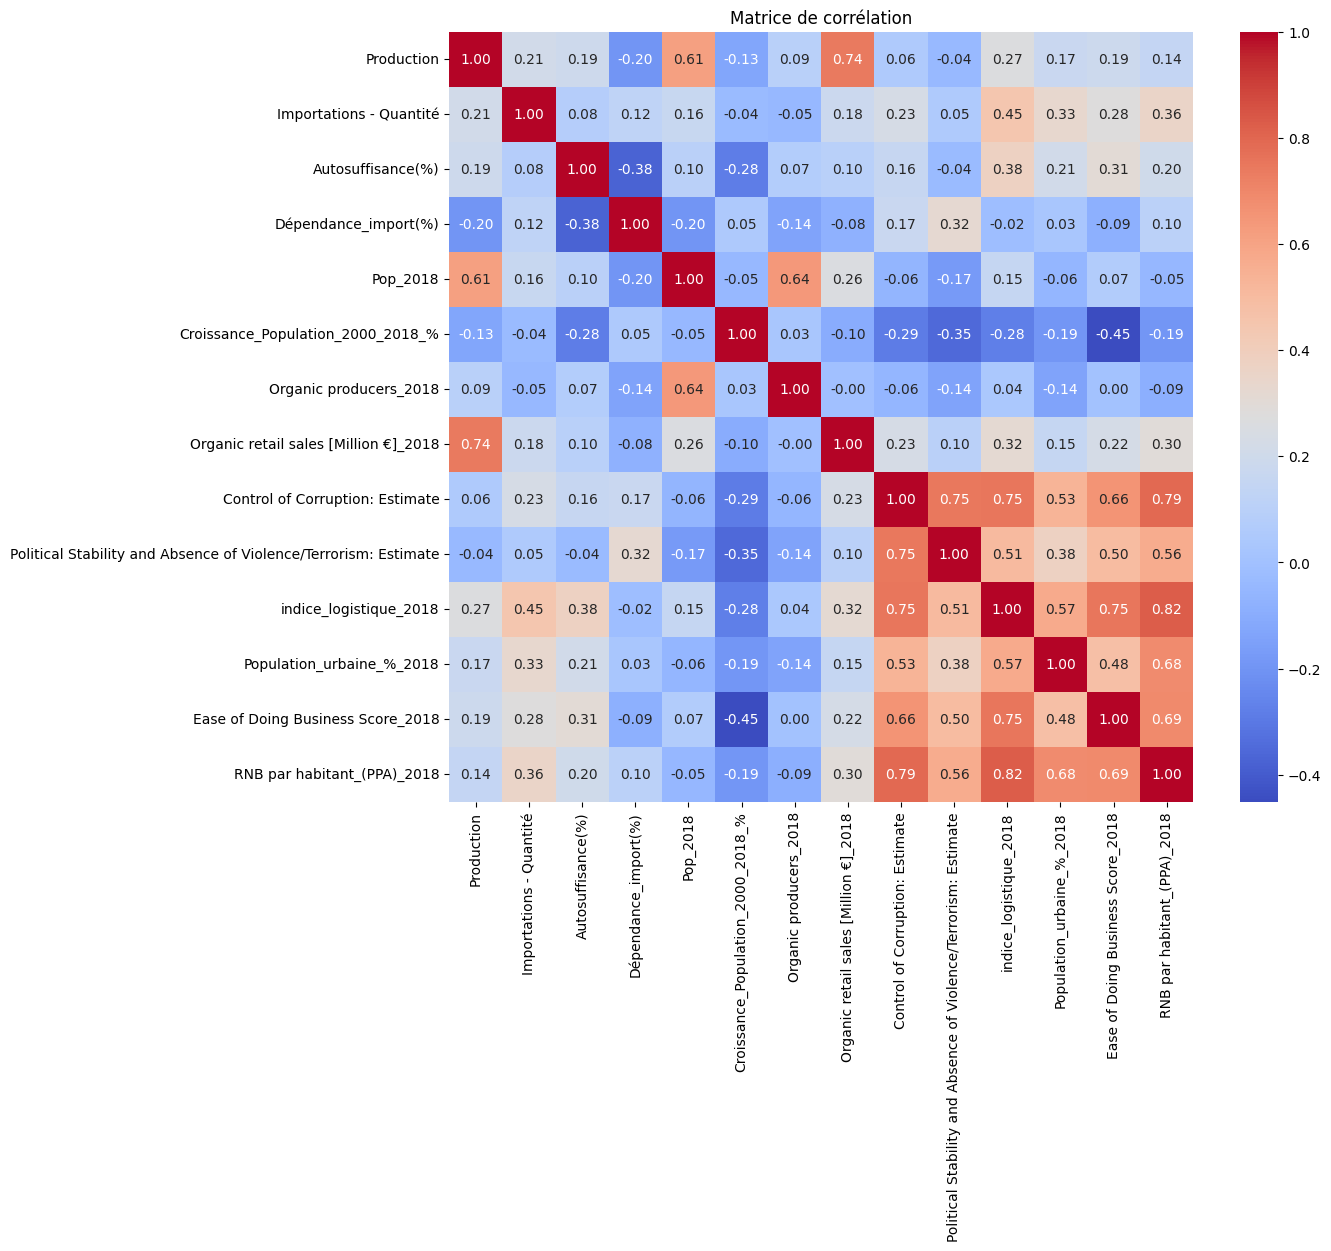

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = main_df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

#### B) Autosuffisance


--- Analyse de la variable : Autosuffisance(%) ---
count    140.000000
mean      83.093321
std       48.932613
min        0.000000
25%       51.246224
50%       90.632832
75%      100.610331
max      304.605263
Name: Autosuffisance(%), dtype: float64
Valeurs manquantes : 0
Asymétrie (Skewness) : 1.06
Aplatissement (Kurtosis) : 4.28
Test de Shapiro-Wilk : p-value = 0.0000 => Non normale
Nombre de valeurs aberrantes (outliers) : 6


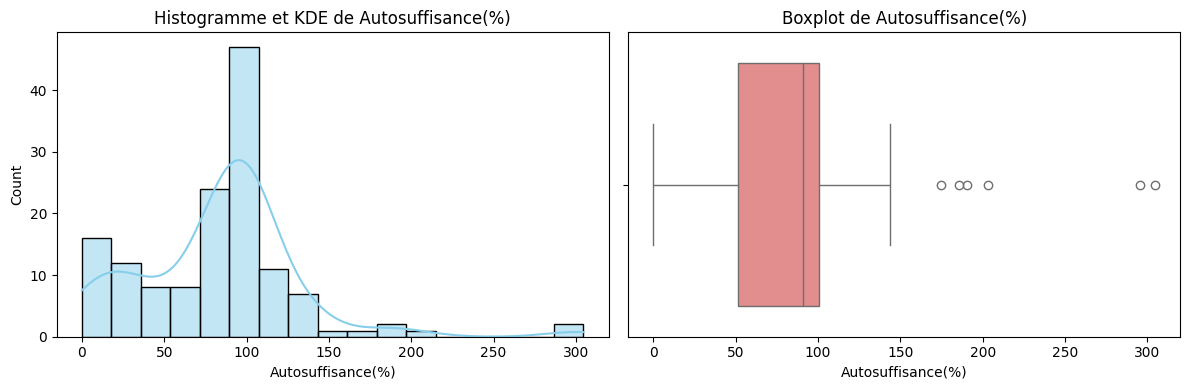

In [67]:
autosuffisance=main_df["Autosuffisance(%)"]
analyse_variable(autosuffisance)

Bizarre ce graphique , des personnes ont entre 0 à 10 kg de nourriture par personne par an?? Pas possible...

/tmp/ipython-input-64-3914442870.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10[variable], y=top10["Zone"], palette='Greens_r')


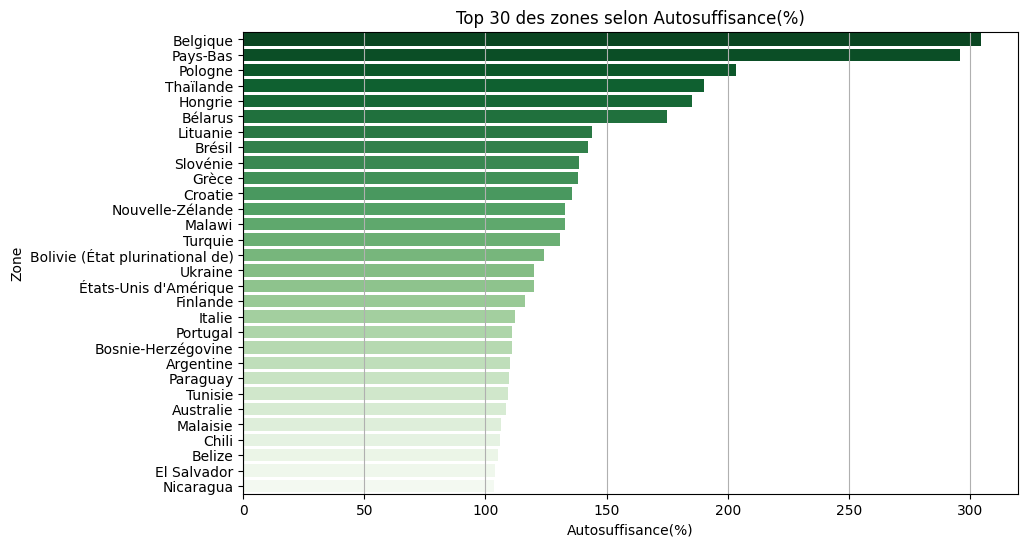

In [68]:
top10_pays(main_df[["Autosuffisance(%)","Zone"]],"Autosuffisance(%)",30)

/tmp/ipython-input-64-3914442870.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flop10[variable], y=flop10["Zone"], palette='Reds')


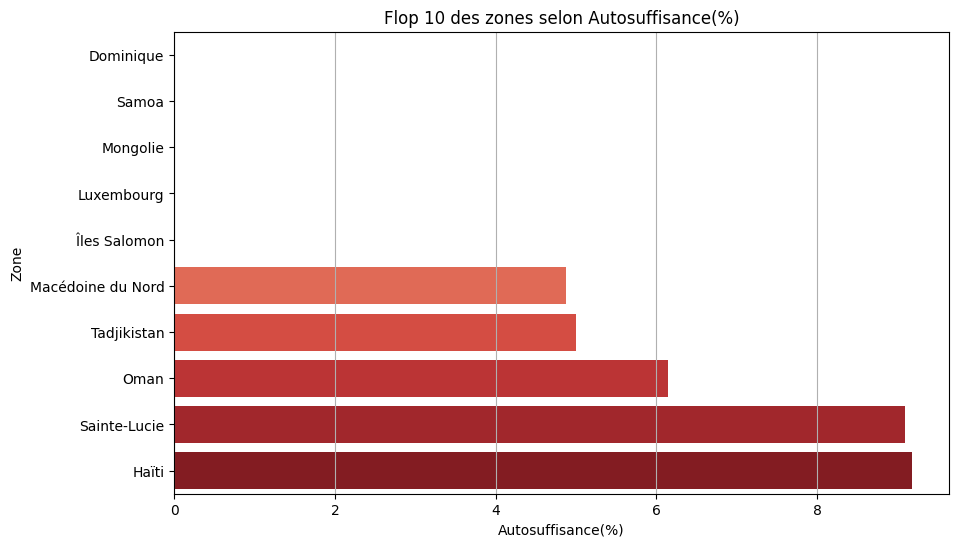

In [69]:
flop_10_pays(main_df[["Autosuffisance(%)","Zone"]],"Autosuffisance(%)")

#### C) Dépendance Importations(%)


--- Analyse de la variable : Dépendance_import(%) ---
count    140.000000
mean      41.762621
std       47.891525
min        0.000000
25%        3.576907
50%       23.052055
75%       72.865079
max      222.368421
Name: Dépendance_import(%), dtype: float64
Valeurs manquantes : 0
Asymétrie (Skewness) : 1.53
Aplatissement (Kurtosis) : 2.56
Test de Shapiro-Wilk : p-value = 0.0000 => Non normale
Nombre de valeurs aberrantes (outliers) : 4


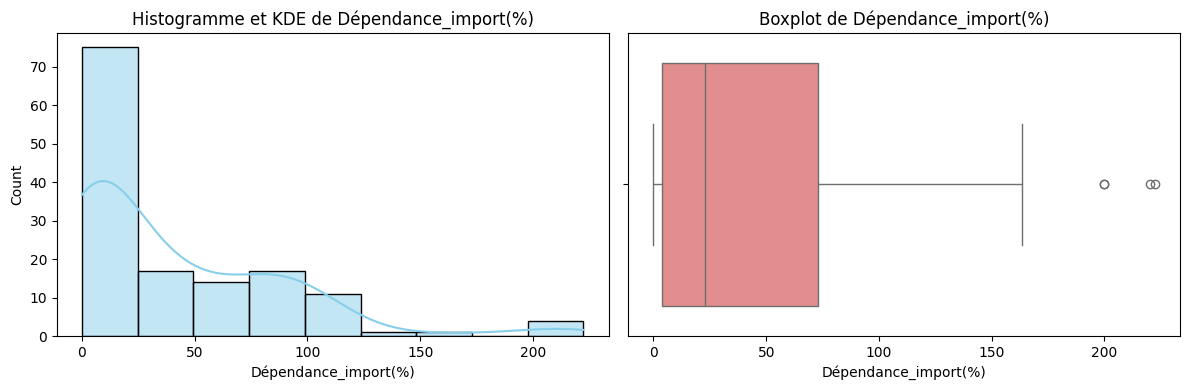

In [70]:
analyse_variable(main_df["Dépendance_import(%)"])

###### Zscore outliers

In [71]:
dépendance_import=main_df[["Dépendance_import(%)","Zone"]]
outliers=liste_pays_outliers_Z_Score(dépendance_import,"Dépendance_import(%)",2)
for i in outliers: print(i)

Outliers avec Z score supérieur à 2 :
Belgique
Gambie
Pays-Bas
Timor-Leste
Îles Salomon


###### top10

/tmp/ipython-input-64-3914442870.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10[variable], y=top10["Zone"], palette='Greens_r')


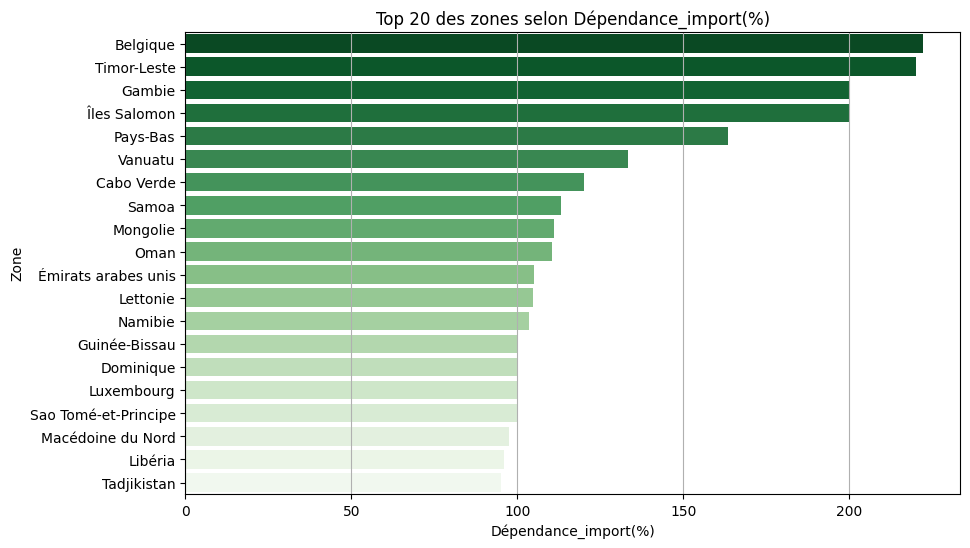

In [72]:
top10_pays(dépendance_import,"Dépendance_import(%)",20)

###### flop10

/tmp/ipython-input-64-3914442870.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flop10[variable], y=flop10["Zone"], palette='Reds')


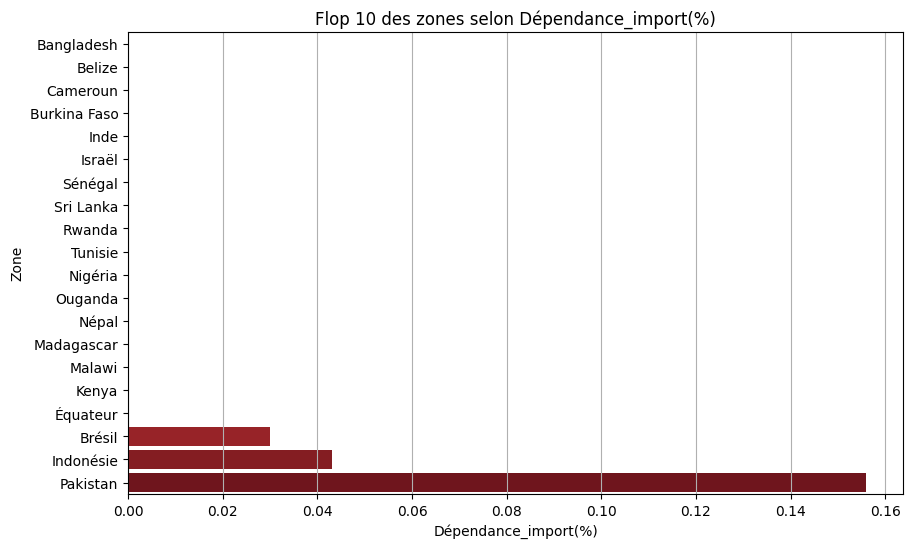

In [73]:
flop_10_pays(dépendance_import,"Dépendance_import(%)",20)

#### D) Importations - Quantité


--- Analyse de la variable : Importations - Quantité ---
count     140.00000
mean       88.25000
std       186.32748
min         0.00000
25%         3.00000
50%        16.00000
75%        79.75000
max      1069.00000
Name: Importations - Quantité, dtype: float64
Valeurs manquantes : 0
Asymétrie (Skewness) : 3.34
Aplatissement (Kurtosis) : 11.53
Test de Shapiro-Wilk : p-value = 0.0000 => Non normale
Nombre de valeurs aberrantes (outliers) : 15


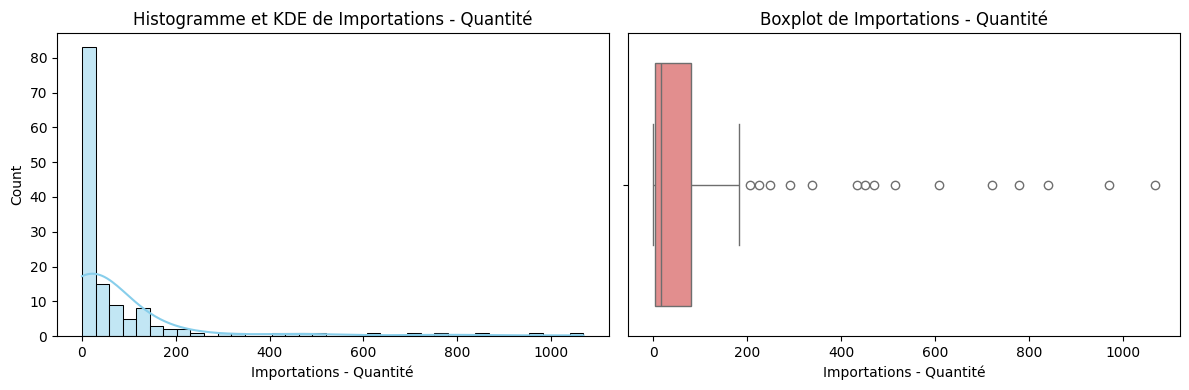

In [74]:
importations=main_df["Importations - Quantité"]
analyse_variable(importations)

In [75]:
importations=main_df[["Importations - Quantité","Zone"]]
outliers=liste_pays_outliers_Z_Score(importations,"Importations - Quantité",2)
for i in outliers: print(i)

Outliers avec Z score supérieur à 2 :
Afrique du Sud
Allemagne
Arabie saoudite
Iraq
Japon
Mexique
Pays-Bas
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord


/tmp/ipython-input-64-3914442870.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10[variable], y=top10["Zone"], palette='Greens_r')


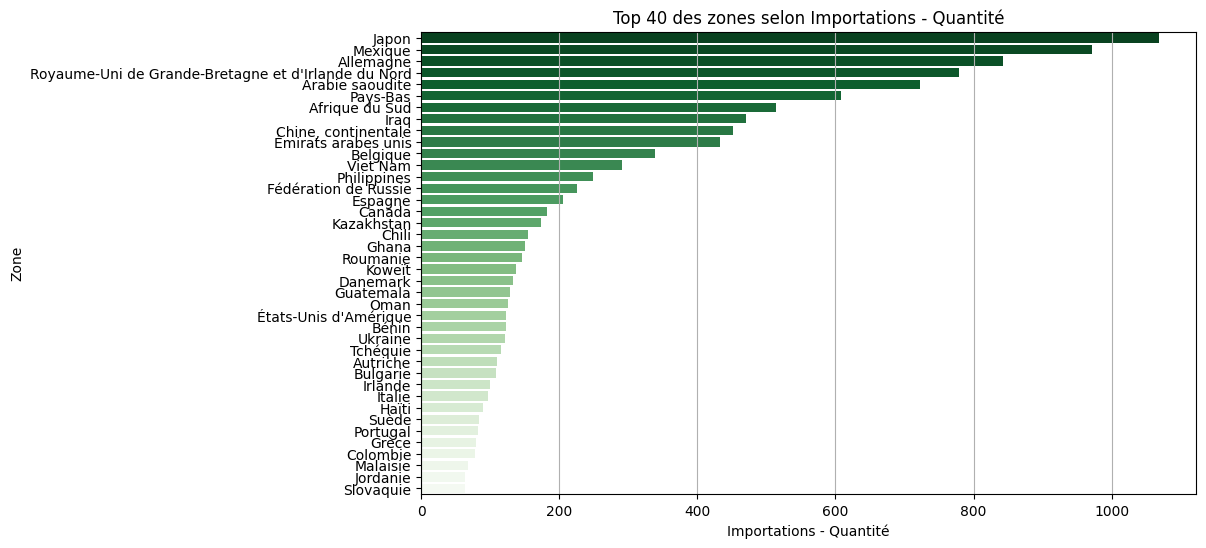

In [76]:
top10_pays(importations,"Importations - Quantité",40)

/tmp/ipython-input-64-3914442870.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flop10[variable], y=flop10["Zone"], palette='Reds')


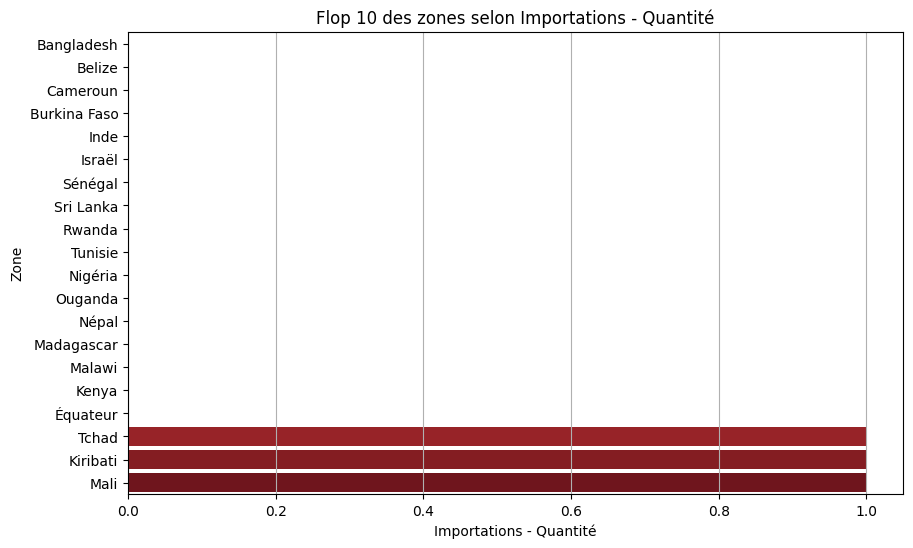

In [77]:
flop_10_pays(importations,"Importations - Quantité",20)

#### E) Pop_2018


--- Analyse de la variable : Pop_2018 ---
count    1.400000e+02
mean     4.912183e+04
std      1.701110e+05
min      7.162500e+01
25%      3.417945e+03
50%      1.038922e+04
75%      3.241763e+04
max      1.427648e+06
Name: Pop_2018, dtype: float64
Valeurs manquantes : 0
Asymétrie (Skewness) : 7.15
Aplatissement (Kurtosis) : 53.32
Test de Shapiro-Wilk : p-value = 0.0000 => Non normale
Nombre de valeurs aberrantes (outliers) : 16


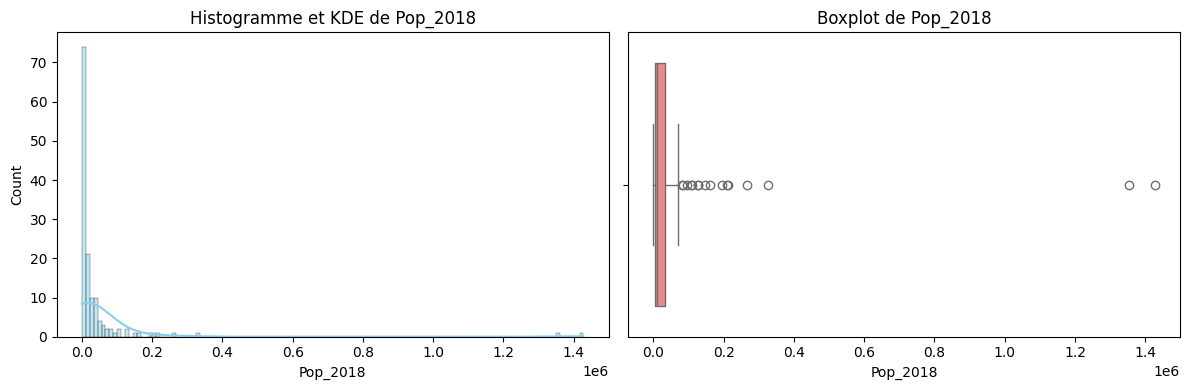

In [78]:
pop_2018=main_df["Pop_2018"]
analyse_variable(pop_2018)

In [79]:
pop_2018=main_df[["Pop_2018","Zone"]]
outliers=liste_pays_outliers_Z_Score(pop_2018,"Pop_2018",2)
for i in outliers : print(i)

Outliers avec Z score supérieur à 2 :
Chine, continentale
Inde


#### F) Croissance_population_2000_2018_%


--- Analyse de la variable : Croissance_Population_2000_2018_% ---
count    140.000000
mean      31.282286
std       31.406495
min      -20.010000
25%        9.905000
50%       26.125000
75%       51.075000
max      207.300000
Name: Croissance_Population_2000_2018_%, dtype: float64
Valeurs manquantes : 0
Asymétrie (Skewness) : 1.58
Aplatissement (Kurtosis) : 5.78
Test de Shapiro-Wilk : p-value = 0.0000 => Non normale
Nombre de valeurs aberrantes (outliers) : 2


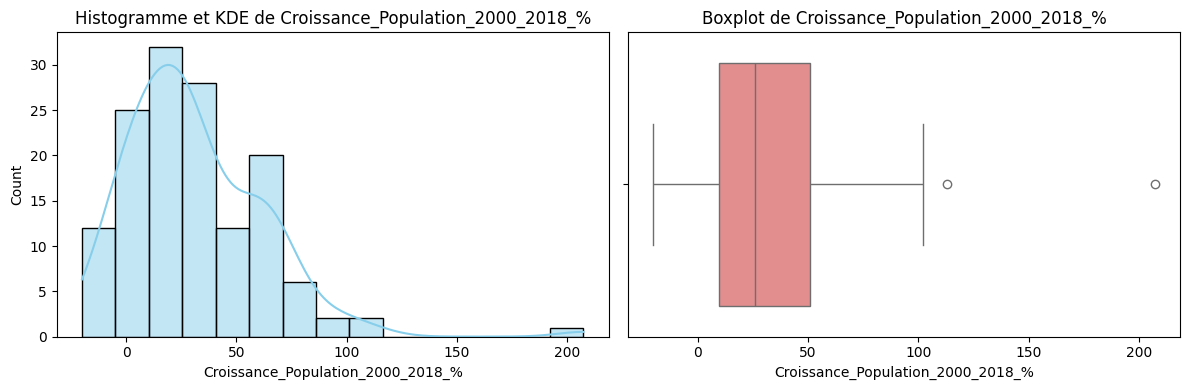

In [80]:
croissance_pop=main_df["Croissance_Population_2000_2018_%"]
analyse_variable(croissance_pop)

In [81]:
croissance_pop=main_df[["Croissance_Population_2000_2018_%","Zone"]]
outlier=liste_pays_outliers_Z_Score(croissance_pop,"Croissance_Population_2000_2018_%",2)
for i in outliers : print(i)


Outliers avec Z score supérieur à 2 :
Chine, continentale
Inde


#### F) Organic producers_2018


--- Analyse de la variable : Organic producers_2018 ---
count    1.400000e+02
mean     1.904665e+04
std      1.009629e+05
min      0.000000e+00
25%      4.950000e+01
50%      1.102500e+03
75%      6.070500e+03
max      1.149371e+06
Name: Organic producers_2018, dtype: float64
Valeurs manquantes : 0
Asymétrie (Skewness) : 10.24
Aplatissement (Kurtosis) : 111.03
Test de Shapiro-Wilk : p-value = 0.0000 => Non normale
Nombre de valeurs aberrantes (outliers) : 23


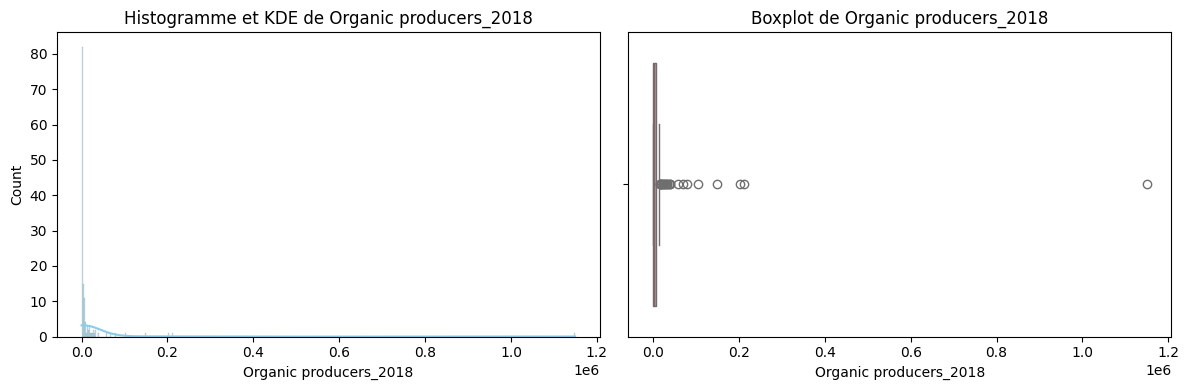

In [82]:
organic_producers=main_df["Organic producers_2018"]
analyse_variable(organic_producers)

Detection outliers Zcore

In [83]:
organic_producers=main_df[["Organic producers_2018","Zone"]]
outliers=liste_pays_outliers_Z_Score(organic_producers,"Organic producers_2018",2)
for i in outliers:print(i)


Outliers avec Z score supérieur à 2 :
Inde


/tmp/ipython-input-64-3914442870.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10[variable], y=top10["Zone"], palette='Greens_r')


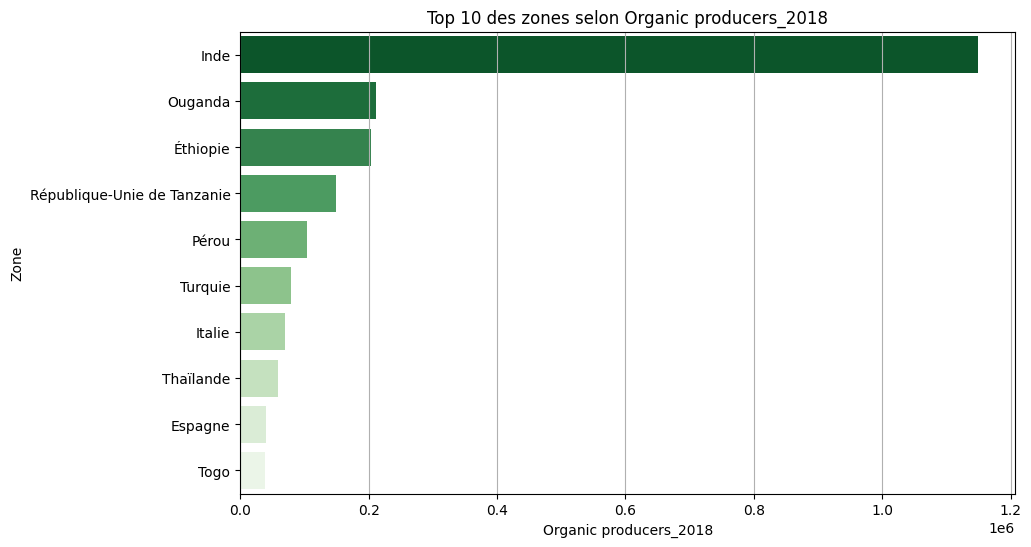

In [84]:
top10_pays(organic_producers,"Organic producers_2018")

/tmp/ipython-input-64-3914442870.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flop10[variable], y=flop10["Zone"], palette='Reds')


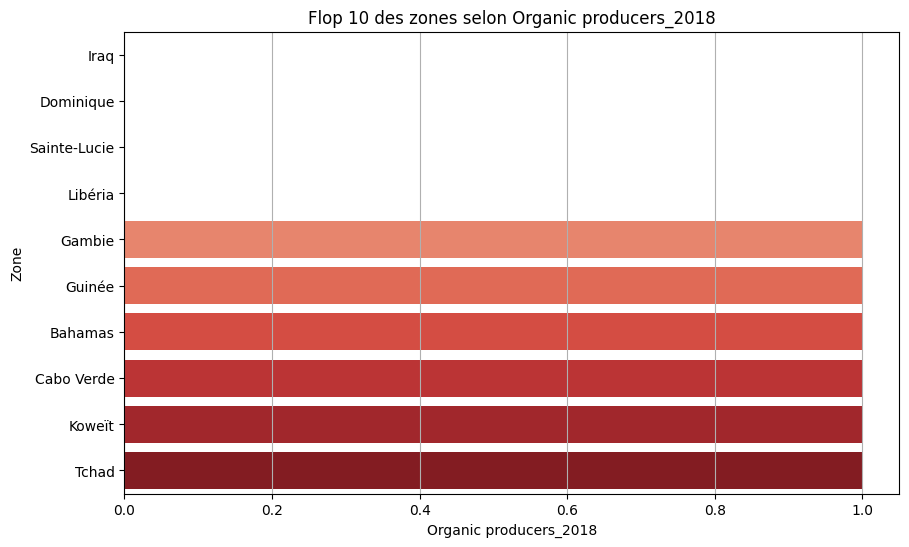

In [85]:
flop_10_pays(organic_producers,"Organic producers_2018")

#### G) Organic retail sales [Million €]_2018


--- Analyse de la variable : Organic retail sales [Million €]_2018 ---
count      140.000000
mean       621.826357
std       3630.142268
min          0.000000
25%          0.000000
50%          0.000000
75%         30.000000
max      40558.850000
Name: Organic retail sales [Million €]_2018, dtype: float64
Valeurs manquantes : 0
Asymétrie (Skewness) : 9.85
Aplatissement (Kurtosis) : 103.75
Test de Shapiro-Wilk : p-value = 0.0000 => Non normale
Nombre de valeurs aberrantes (outliers) : 26


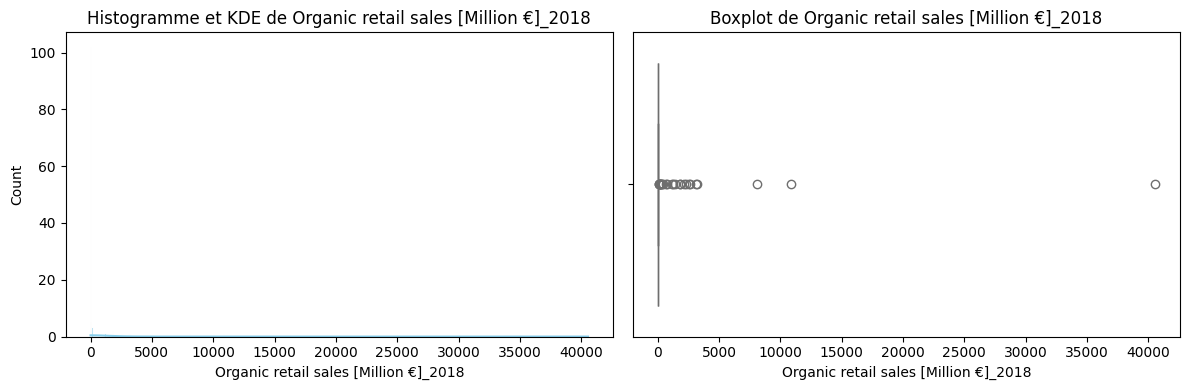

In [86]:
organic_retails_sales=main_df["Organic retail sales [Million €]_2018"]
analyse_variable(organic_retails_sales)

###### Outliers Z-Score

In [87]:
organic_retails_sales=main_df[["Organic retail sales [Million €]_2018","Zone"]]
outliers=liste_pays_outliers_Z_Score(organic_retails_sales,"Organic retail sales [Million €]_2018",2)
for i in outliers : print(i)

Outliers avec Z score supérieur à 2 :
Allemagne
Chine, continentale
États-Unis d'Amérique


In [88]:
pourcentage_quantite_importation_outlier=(organic_retails_sales[organic_retails_sales['Zone'].isin(outliers)]["Organic retail sales [Million €]_2018"].sum()/organic_retails_sales["Organic retail sales [Million €]_2018"].sum())*100
print(f"Les outliers représente {round(pourcentage_quantite_importation_outlier,2)}% des ventes de poulets organiques.")

Les outliers représente 68.41% des ventes de poulets organiques.


###### Top10

/tmp/ipython-input-64-3914442870.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10[variable], y=top10["Zone"], palette='Greens_r')


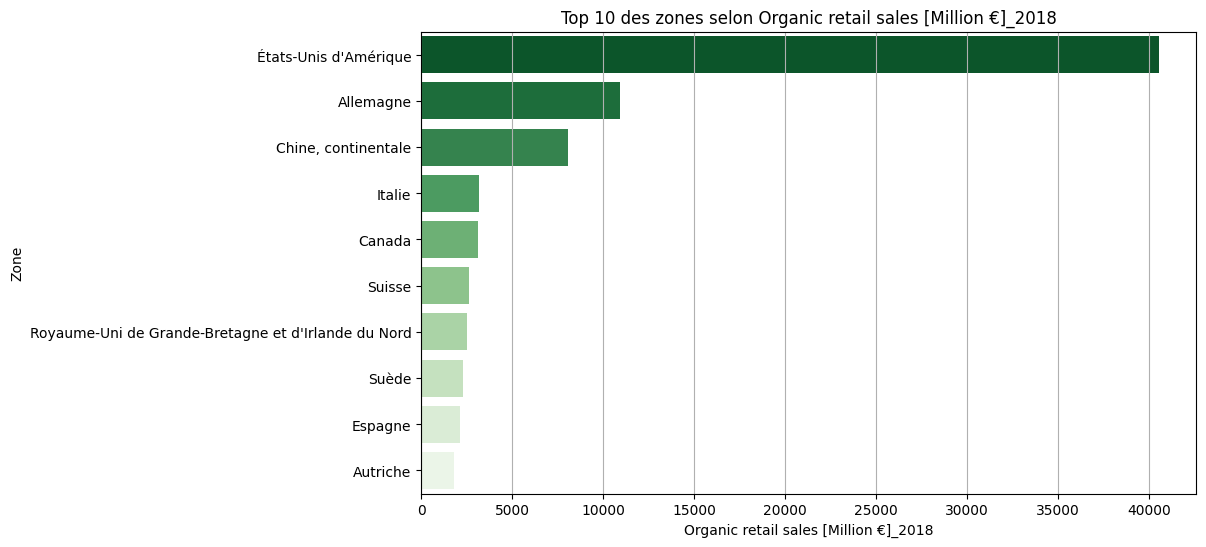

In [89]:
top10_pays(organic_retails_sales,"Organic retail sales [Million €]_2018",10)


/tmp/ipython-input-64-3914442870.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10[variable], y=top10["Zone"], palette='Greens_r')


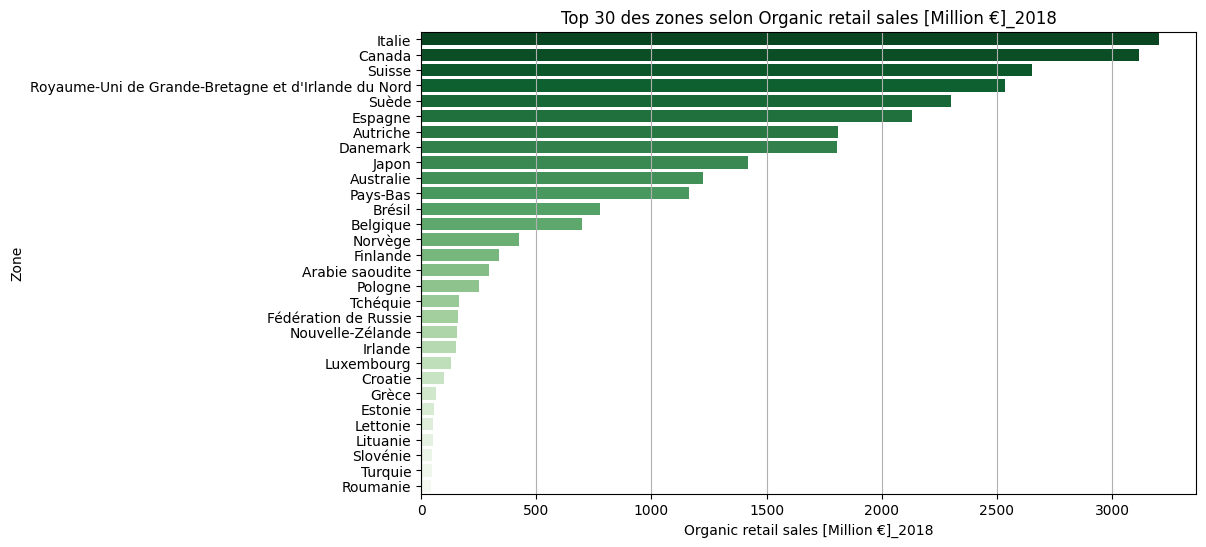

In [90]:
top10_pays(
    organic_retails_sales[~organic_retails_sales['Zone'].isin(['Allemagne', 'Chine, continentale', "États-Unis d'Amérique"])],
    "Organic retail sales [Million €]_2018",
    30
)

###### Flop10

/tmp/ipython-input-64-3914442870.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flop10[variable], y=flop10["Zone"], palette='Reds')


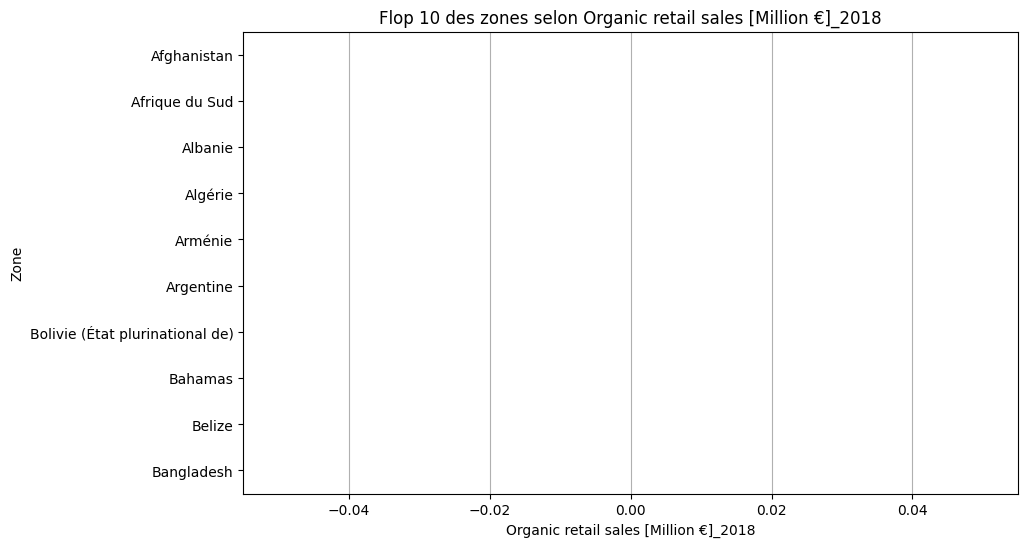

In [91]:
flop_10_pays(organic_retails_sales,"Organic retail sales [Million €]_2018")

#### H) Control of Corruption : Estimate


--- Analyse de la variable : Control of Corruption: Estimate ---
count    140.000000
mean      -0.001176
std        0.938753
min       -1.559087
25%       -0.663900
50%       -0.230252
75%        0.550424
max        2.171759
Name: Control of Corruption: Estimate, dtype: float64
Valeurs manquantes : 0
Asymétrie (Skewness) : 0.73
Aplatissement (Kurtosis) : -0.27
Test de Shapiro-Wilk : p-value = 0.0000 => Non normale
Nombre de valeurs aberrantes (outliers) : 0


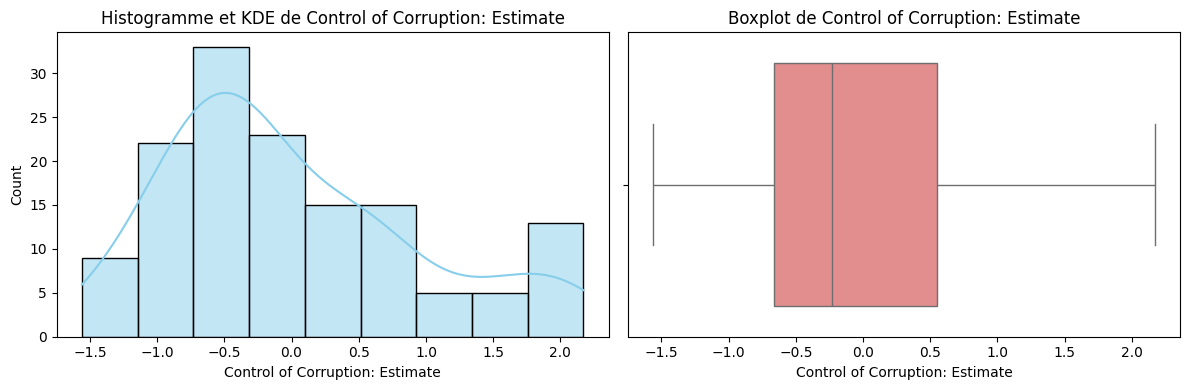

In [92]:
controlOfCorruption=main_df["Control of Corruption: Estimate"]
analyse_variable(controlOfCorruption)

###### Detection Outliers Z score

In [93]:
controlOfCorruption=main_df[["Control of Corruption: Estimate","Zone"]]
outliers=liste_pays_outliers_Z_Score(controlOfCorruption,"Control of Corruption: Estimate",2)

for i in outliers : print(i)

Outliers avec Z score supérieur à 2 :
Allemagne
Danemark
Finlande
Luxembourg
Norvège
Nouvelle-Zélande
Pays-Bas
Suisse
Suède


#### J) Political Stability and Absence of Violence/Terrorism: Estimate


--- Analyse de la variable : Political Stability and Absence of Violence/Terrorism: Estimate ---
count    140.000000
mean      -0.060884
std        0.874546
min       -2.753441
25%       -0.645353
50%       -0.019383
75%        0.699251
max        1.512163
Name: Political Stability and Absence of Violence/Terrorism: Estimate, dtype: float64
Valeurs manquantes : 0
Asymétrie (Skewness) : -0.54
Aplatissement (Kurtosis) : 0.04
Test de Shapiro-Wilk : p-value = 0.0026 => Non normale
Nombre de valeurs aberrantes (outliers) : 1


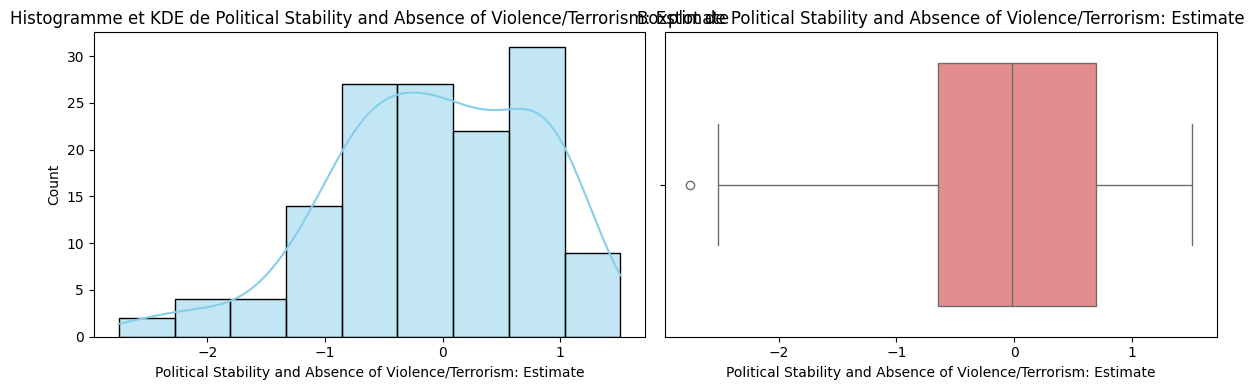

In [94]:
Political_Stability=main_df["Political Stability and Absence of Violence/Terrorism: Estimate"]
analyse_variable(Political_Stability)

#### K) indice_logistique_2018


--- Analyse de la variable : indice_logistique_2018 ---
count    140.000000
mean       2.892000
std        0.538828
min        1.950000
25%        2.527500
50%        2.755000
75%        3.205000
max        4.200000
Name: indice_logistique_2018, dtype: float64
Valeurs manquantes : 0
Asymétrie (Skewness) : 0.72
Aplatissement (Kurtosis) : -0.40
Test de Shapiro-Wilk : p-value = 0.0000 => Non normale
Nombre de valeurs aberrantes (outliers) : 0


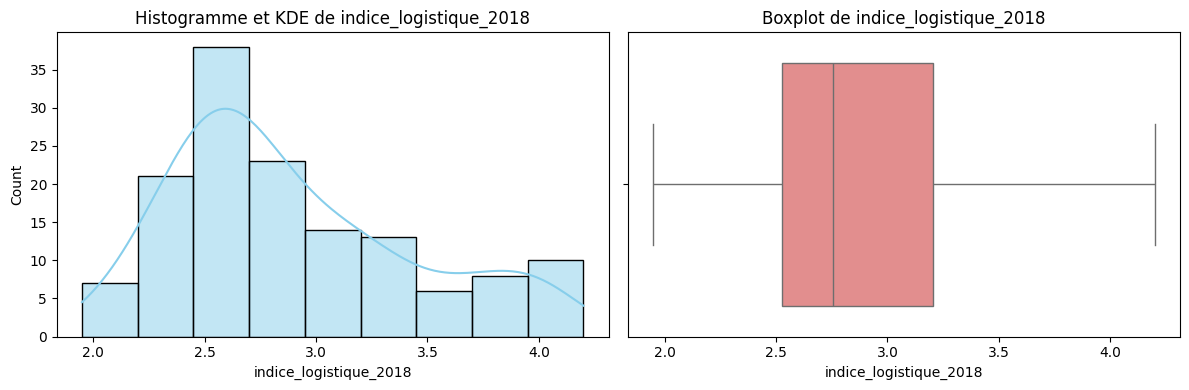

In [95]:
Indice_logistique=main_df["indice_logistique_2018"]
analyse_variable(Indice_logistique)

#### L) Population_urbaine_%_2018


--- Analyse de la variable : Population_urbaine_%_2018 ---
count    140.000000
mean      59.188614
std       22.208530
min       16.425000
25%       42.280750
50%       60.188500
75%       77.460750
max      100.000000
Name: Population_urbaine_%_2018, dtype: float64
Valeurs manquantes : 0
Asymétrie (Skewness) : -0.23
Aplatissement (Kurtosis) : -0.95
Test de Shapiro-Wilk : p-value = 0.0013 => Non normale
Nombre de valeurs aberrantes (outliers) : 0


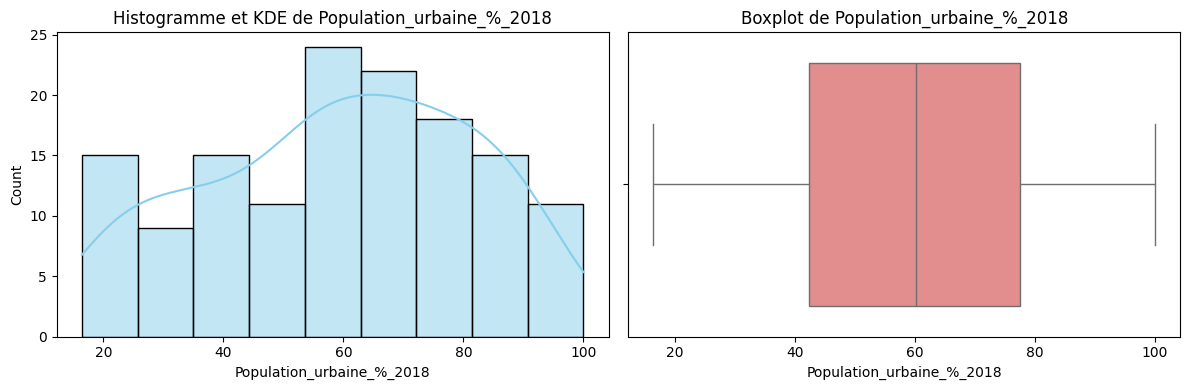

In [96]:
pop_urbaine=main_df["Population_urbaine_%_2018"]
analyse_variable(pop_urbaine)

#### M) Ease of Doing Business Score_2018


--- Analyse de la variable : Ease of Doing Business Score_2018 ---
count    140.000000
mean      64.702857
std       12.126396
min       36.700000
25%       55.275000
50%       65.600000
75%       75.075000
max       87.000000
Name: Ease of Doing Business Score_2018, dtype: float64
Valeurs manquantes : 0
Asymétrie (Skewness) : -0.24
Aplatissement (Kurtosis) : -0.90
Test de Shapiro-Wilk : p-value = 0.0038 => Non normale
Nombre de valeurs aberrantes (outliers) : 0


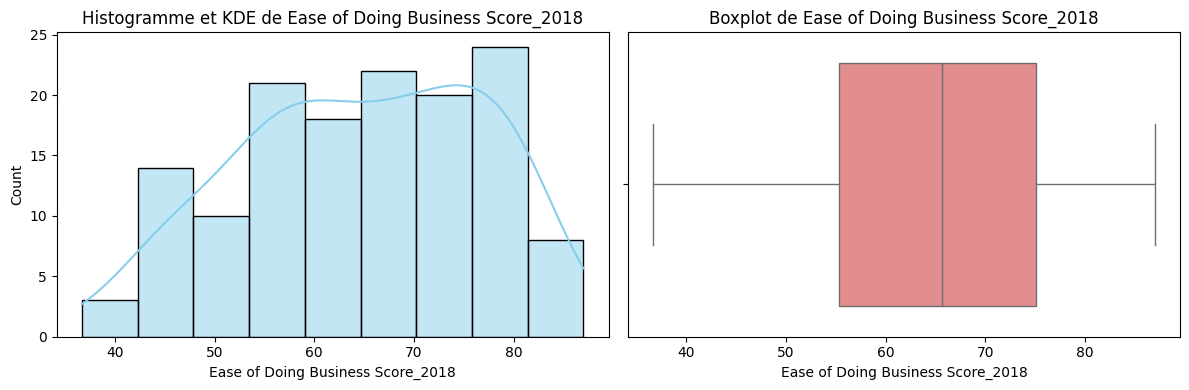

In [97]:
Eodbs_2018=main_df["Ease of Doing Business Score_2018"]
analyse_variable(Eodbs_2018)

#### N) RNB par habitant_(PPA)_2018


--- Analyse de la variable : RNB par habitant_(PPA)_2018 ---
count      140.000000
mean     20622.500000
std      19499.862133
min       1300.000000
25%       4937.500000
50%      13540.000000
75%      30715.000000
max      83270.000000
Name: RNB par habitant_(PPA)_2018, dtype: float64
Valeurs manquantes : 0
Asymétrie (Skewness) : 1.16
Aplatissement (Kurtosis) : 0.46
Test de Shapiro-Wilk : p-value = 0.0000 => Non normale
Nombre de valeurs aberrantes (outliers) : 3


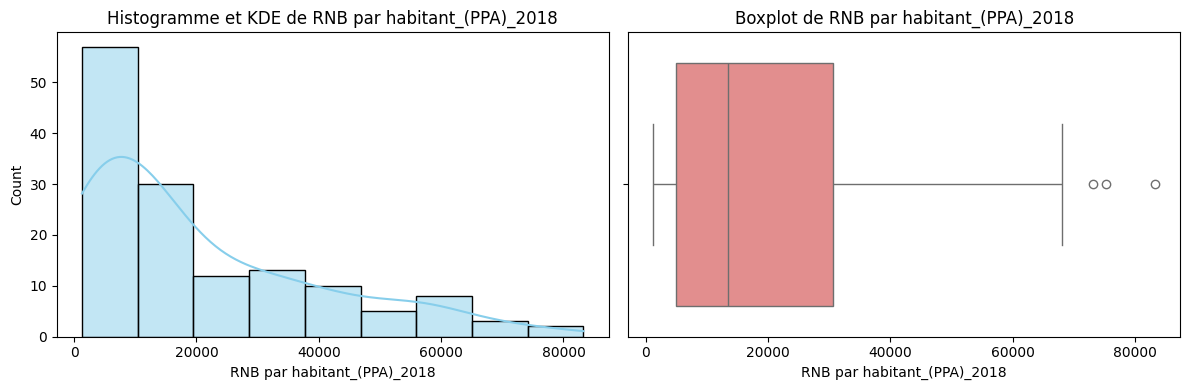

In [98]:
RNB_hab=main_df["RNB par habitant_(PPA)_2018"]
analyse_variable(RNB_hab)

###### Detection outliers via Z score

In [99]:
RNB_hab=main_df[["RNB par habitant_(PPA)_2018","Zone"]]
outliers=liste_pays_outliers_Z_Score(RNB_hab,"RNB par habitant_(PPA)_2018",2)
for i in outliers : print(i)

Outliers avec Z score supérieur à 2 :
Irlande
Luxembourg
Norvège
Suisse
Émirats arabes unis
États-Unis d'Amérique


###### Top 10

/tmp/ipython-input-64-3914442870.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10[variable], y=top10["Zone"], palette='Greens_r')


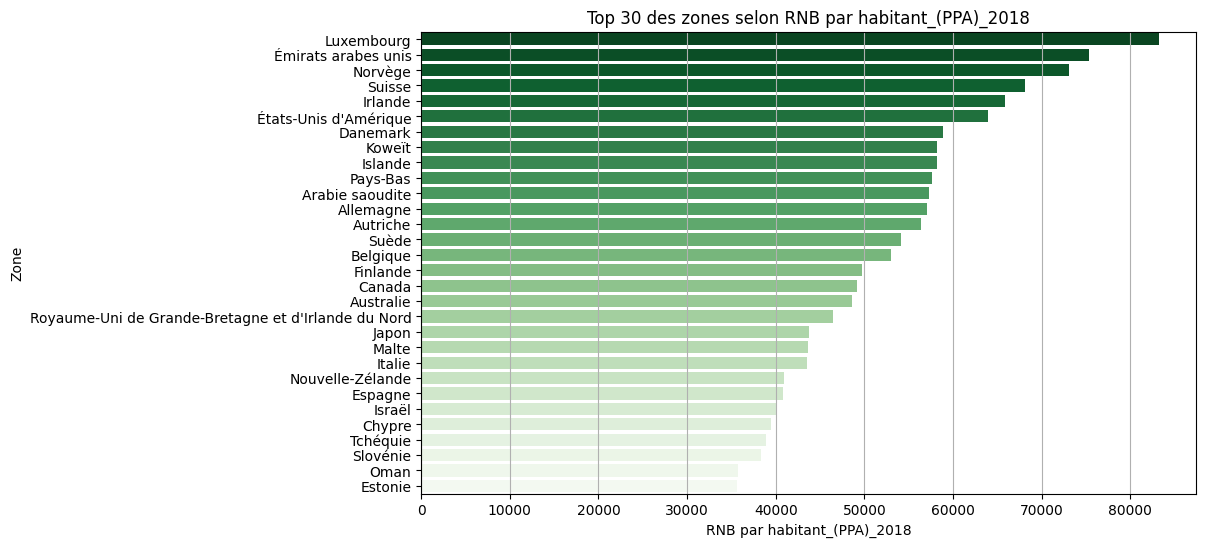

In [100]:
top10_pays(RNB_hab,'RNB par habitant_(PPA)_2018',30)

###### Flop 10

/tmp/ipython-input-64-3914442870.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flop10[variable], y=flop10["Zone"], palette='Reds')


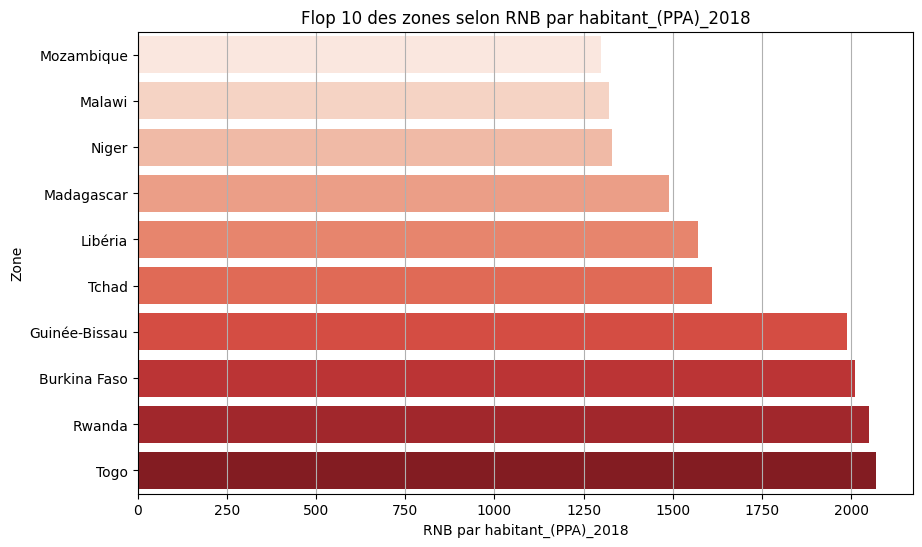

In [101]:
flop_10_pays(RNB_hab,'RNB par habitant_(PPA)_2018')

## III) Exportation du jeu de donnée

In [102]:
main_df.to_csv(chemin+"dataset.csv", index=False)